In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.models import load_model
import cv2
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [2]:
def getArclength(img) -> int:
    #number_of_nonblackpixels = np.count_nonzero(img[:,:,2])
    contours, hierarchy = cv2.findContours(img[:,:,2],cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    total_arclength = 0
    for i in contours:
        total_arclength += cv2.arcLength(i,True)

    return total_arclength

In [16]:
flame_dir = "Flame_cropped_masked/"
fire_dir = "Fire_full/"

def prep_img(file_path):
    IMG_SIZE = 150  # 50 in txt-based
    img_array = cv2.imread(file_path)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    via_array = getArclength(new_array)
    return [new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3),np.array([via_array])]

In [17]:
flame_files = os.listdir(flame_dir)
fire_files = os.listdir(fire_dir)

model = load_model("64x2-CNN_impure_gal.model")

In [18]:
y_pred = []
y_true = []
for filename in flame_files:
    img = prep_img(flame_dir + filename)
    prediction = model.predict(img)
    y_pred.append(int(prediction[0][1]))
    y_true.append(1)  # 1 represents "flame" class

for filename in fire_files:
    img = prep_img(fire_dir + filename)
    prediction = model.predict(img)
    y_pred.append(int(prediction[0][1]))
    y_true.append(0)  # 0 represents "fire" class

y_true = np.array(y_true)
y_pred = np.array(y_pred)

[[755   0]
 [482   0]]
Accuracy:  0.6103476151980598
Precision:  0.0
Recall:  0.0


c:\Users\sagar\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


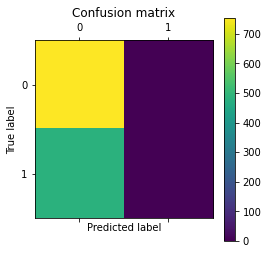

In [19]:
cm = confusion_matrix(y_true, y_pred)
print(cm)
print("Accuracy: ",(cm[0][0]+cm[1][1])/np.sum(cm))
print("Precision: ",precision_score(y_true, y_pred))
print("Recall: ",recall_score(y_true, y_pred))
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()